In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

In [2]:
np.random.seed(0)

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [5]:
assert(X_train.shape[0] == y_train.shape[0]), "#images != #labels" 
assert(X_test.shape[0] == y_test.shape[0]), "#images != #labels" 
assert(X_train.shape[1:] == (28, 28)), "dimension != 28x28"
assert(X_test.shape[1:] == (28, 28)), "dimension != 28x28"

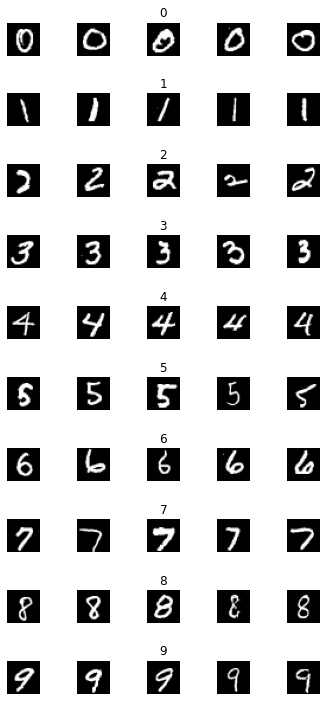

In [6]:
num_of_samples = []
cols = 5
num_classes=10

fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize = (5, 10))
fig.tight_layout()
for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected) - 1), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected)) 

In [7]:
print(num_of_samples)

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


In [8]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [9]:
X_train = X_train/255
X_test = X_test/255

num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)


In [10]:
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=num_pixels, activation='relu'))
    model.add(Dense(10, activation = 'relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(0.01), loss = 'categorical_crossentropy', metrics=['accuracy'])
    return model

In [11]:
model = create_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs=10, batch_size = 200, verbose = 1, shuffle = 1)

Epoch 1/10
270/270 [==============================] - 1s 3ms/step - loss: 0.5409 - accuracy: 0.8356 - val_loss: 0.2750 - val_accuracy: 0.9192
Epoch 2/10
270/270 [==============================] - 1s 2ms/step - loss: 0.2973 - accuracy: 0.9131 - val_loss: 0.2223 - val_accuracy: 0.9368
Epoch 3/10
270/270 [==============================] - 1s 2ms/step - loss: 0.2678 - accuracy: 0.9215 - val_loss: 0.2154 - val_accuracy: 0.9382
Epoch 4/10
270/270 [==============================] - 0s 2ms/step - loss: 0.2497 - accuracy: 0.9265 - val_loss: 0.1993 - val_accuracy: 0.9422
Epoch 5/10
270/270 [==============================] - 1s 2ms/step - loss: 0.2347 - accuracy: 0.9314 - val_loss: 0.1965 - val_accuracy: 0.9395
Epoch 6/10
270/270 [==============================] - 1s 2ms/step - loss: 0.2250 - accuracy: 0.9326 - val_loss: 0.1861 - val_accuracy: 0.9475
Epoch 7/10
270/270 [==============================] - 1s 2ms/step - loss: 0.2100 - accuracy: 0.9360 - val_loss: 0.1864 - val_accuracy: 0.9460
Epoch 

Text(0.5, 0, 'epoch')

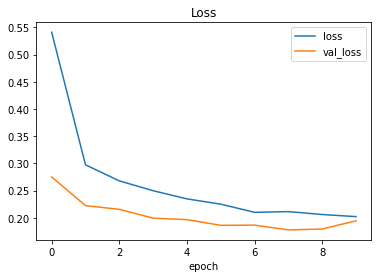

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

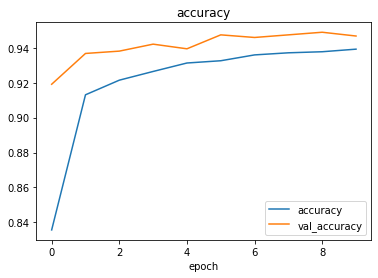

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('accuracy')
plt.xlabel('epoch')

In [15]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Score:', score[0])
print('Test accuracy:', score[1])

Test Score: 0.23926877975463867
Test accuracy: 0.9348000288009644


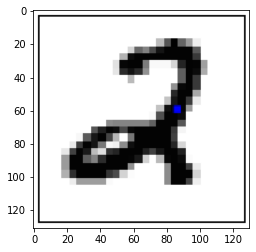

In [16]:
import requests
from PIL import Image
url = 'https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img)

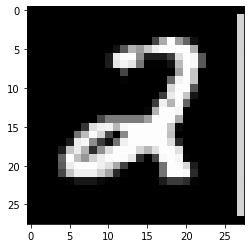

In [26]:
import cv2

img_array = np.asarray(img)
resized = cv2.resize(img_array, (28, 28))
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
image = cv2.bitwise_not(gray_scale)
plt.imshow(image, cmap = plt.get_cmap("gray"))


In [27]:
image = image/255
image = image.reshape(1, 784)

In [28]:
prediction = np.argmax(model.predict(image), axis = -1)
print("pridicted digit:", str(prediction))

pridicted digit: [2]
